In [331]:
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
import os
import fiona
from statistics import mean, median
from pandas import read_csv

# **VEST MT 2020**

## **VEST Documentation**

#### Election Results

**sources**

Election results from Montana Secretary of State (https://sosmt.gov/elections/results/)

### Shapefiles

**sources**

Precinct shapefile primarily from Dave Ritts at the Montana State Library, as prepared for submission to the U.S. Census Bureau's 2020 Redistricting Data Program.

**Processing**

The three precincts in Treasure County were merged as the county transitioned to a single countywide precinct prior to the 2020 election.

## Candidate

G20PRERTRU - Donald J. Trump (Republican Party)
G20PREDBID - Joseph R. Biden (Democratic Party)
G20PRELJOR - Jo Jorgensen (Libertarian Party)

G20USSRDAI - Steve Daines (Republican Party)
G20USSDBUL - Steve Bullock (Democratic Party)

G20HALRROS - Matt Rosendale (Republican Party)
G20HALDWIL - Kathleen Williams (Democratic Party)

G20GOVRGIA - Greg Gianforte (Republican Party)
G20GOVDCOO - Mike Cooney (Democratic Party)
G20GOVLBIS - Lyman Bishop (Libertarian Party)

G20ATGRKNU - Austin Knudsen (Republican Party)
G20ATGDGRA - Raph Graybill (Democratic Party)

G20SOSRJAC - Christi Jacobsen (Republican Party)
G20SOSDBEN - Bryce Bennett (Democratic Party)

G20AUDRDOW - Troy Downing (Republican Party)
G20AUDDMOR - Shane A. Morigeau (Democratic Party)
G20AUDLROO - Roger Roots (Libertarian Party)

G20SPIRARN - Elsie Arntzen (Republican Party)
G20SPIDROM - Melissa Romano (Democratic Party)
G20SPILLEA - Kevin Leatherbarrow (Libertarian Party)


In [332]:
vest_mt_20 = gp.read_file("./raw-from-source/VEST/mt_2020/mt_2020.shp")
print(vest_mt_20.head())

  STATEFP10 COUNTYFP10    COUNTY             NAME       SOSPRECINC  \
0        30        063  Missoula        Bonner 89        BONNER 89   
1        30        063  Missoula        Bonner 92        BONNER 92   
2        30        063  Missoula    C S Porter 98      CSPORTER 98   
3        30        063  Missoula  Chief Charlo 90  CHIEF CHARLO 90   
4        30        063  Missoula       Clinton 89       CLINTON 89   

   G20PRERTRU  G20PREDBID  G20PRELJOR  G20USSRDAI  G20USSDBUL  ...  \
0          93         112           2         105         109  ...   
1         715         797          42         653         894  ...   
2         726        1218          76         677        1342  ...   
3         550         895          46         542         964  ...   
4         313         203          19         306         229  ...   

   G20ATGDGRA  G20SOSRJAC  G20SOSDBEN  G20AUDRDOW  G20AUDDMOR  G20AUDLROO  \
0         105         109         102          97         104           8   
1   

# **Load and Clean Election Results**
## **Load Election Results**

Created 2020-GeneralPrecinct-by-Precinct_Votes.csv from 2020-GeneralPrecinct-by-Precinct_Votes.xlsx by opening in Excel, removing the first header row, and saving as a csv. No file modifications were made.


In [333]:
elections_2020 = pd.read_csv("./raw-from-source/MT_SOS/2020_General_Precinct-by-Precinct.csv")

In [334]:
elections_2020.shape

(29386, 8)

In [335]:
elections_2020.head()

,CountyName,PrecinctName,RaceName,PartyCode,Votes,NameOnBallot,HouseDistrict,SenateDistrict
0,Beaverhead,PRECINCT 01,PRESIDENT,DEM,166,JOSEPH R. BIDEN AND KAMALA D. HARRIS,House District 72,Senate District 36
1,Beaverhead,PRECINCT 02,PRESIDENT,DEM,181,JOSEPH R. BIDEN AND KAMALA D. HARRIS,House District 72,Senate District 36
2,Beaverhead,PRECINCT 03,PRESIDENT,DEM,227,JOSEPH R. BIDEN AND KAMALA D. HARRIS,House District 72,Senate District 36
3,Beaverhead,PRECINCT 04,PRESIDENT,DEM,34,JOSEPH R. BIDEN AND KAMALA D. HARRIS,House District 72,Senate District 36
4,Beaverhead,PRECINCT 05,PRESIDENT,DEM,24,JOSEPH R. BIDEN AND KAMALA D. HARRIS,House District 72,Senate District 36


In [336]:
office_list = ['PRESIDENT','UNITED STATES SENATOR','UNITED STATES REPRESENTATIVE','GOVERNOR & LT. GOVERNOR','ATTORNEY GENERAL','SECRETARY OF STATE','STATE AUDITOR','STATE SUPERINTENDENT OF PUBLIC INSTRUCTION']
elections_2020 = elections_2020[elections_2020["RaceName"].isin(office_list)]

In [337]:
candidate_list = ['DONALD J. TRUMP AND MICHAEL R. PENCE','JOSEPH R. BIDEN AND KAMALA D. HARRIS','JO JORGENSEN AND JEREMY "SPIKE" COHEN','STEVE DAINES','STEVE BULLOCK','MATT ROSENDALE','KATHLEEN WILLIAMS','GREG GIANFORTE AND KRISTEN JURAS','MIKE COONEY AND CASEY SCHREINER','LYMAN BISHOP AND JOHN NESPER','AUSTIN KNUDSEN','RAPH GRAYBILL','CHRISTI JACOBSEN','BRYCE BENNETT','TROY DOWNING','SHANE A MORIGEAU','ROGER ROOTS','ELSIE ARNTZEN','MELISSA ROMANO','KEVIN LEATHERBARROW']
elections_2020=elections_2020[elections_2020["NameOnBallot"].isin([x.upper() for x in candidate_list])]

In [338]:
elections_2020["NameOnBallot"].unique()

array(['JOSEPH R. BIDEN AND KAMALA D. HARRIS',
       'JO JORGENSEN AND JEREMY "SPIKE" COHEN',
       'DONALD J. TRUMP AND MICHAEL R. PENCE', 'STEVE BULLOCK',
       'STEVE DAINES', 'KATHLEEN WILLIAMS', 'MATT ROSENDALE',
       'MIKE COONEY AND CASEY SCHREINER', 'LYMAN BISHOP AND JOHN NESPER',
       'GREG GIANFORTE AND KRISTEN JURAS', 'BRYCE BENNETT',
       'CHRISTI JACOBSEN', 'RAPH GRAYBILL', 'AUSTIN KNUDSEN',
       'SHANE A MORIGEAU', 'ROGER ROOTS', 'TROY DOWNING',
       'MELISSA ROMANO', 'KEVIN LEATHERBARROW', 'ELSIE ARNTZEN'],
      dtype=object)

In [339]:
elections_2020.shape

(13260, 8)

In [340]:
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Montana"]
fips_file["FIPS County"] = fips_file["FIPS County"].astype(str)
fips_file["FIPS County"] = fips_file["FIPS County"].str.zfill(3)
fips_dict = dict(zip(fips_file['County Name'], fips_file['FIPS County']))
fips_dict

{'Beaverhead': '001',
 'Big Horn': '003',
 'Blaine': '005',
 'Broadwater': '007',
 'Carbon': '009',
 'Carter': '011',
 'Cascade': '013',
 'Chouteau': '015',
 'Custer': '017',
 'Daniels': '019',
 'Dawson': '021',
 'Deer Lodge': '023',
 'Fallon': '025',
 'Fergus': '027',
 'Flathead': '029',
 'Gallatin': '031',
 'Garfield': '033',
 'Glacier': '035',
 'Golden Valley': '037',
 'Granite': '039',
 'Hill': '041',
 'Jefferson': '043',
 'Judith Basin': '045',
 'Lake': '047',
 'Lewis and Clark': '049',
 'Liberty': '051',
 'Lincoln': '053',
 'McCone': '055',
 'Madison': '057',
 'Meagher': '059',
 'Mineral': '061',
 'Missoula': '063',
 'Musselshell': '065',
 'Park': '067',
 'Petroleum': '069',
 'Phillips': '071',
 'Pondera': '073',
 'Powder River': '075',
 'Powell': '077',
 'Prairie': '079',
 'Ravalli': '081',
 'Richland': '083',
 'Roosevelt': '085',
 'Rosebud': '087',
 'Sanders': '089',
 'Sheridan': '091',
 'Silver Bow': '093',
 'Stillwater': '095',
 'Sweet Grass': '097',
 'Teton': '099',
 'Toole'

In [341]:
elections_2020["STATEFP10"]= '30'
elections_2020["COUNTYFP10"]=elections_2020["CountyName"].map(fips_dict).fillna(elections_2020["CountyName"])

print(elections_2020["COUNTYFP10"].unique())

elections_2020.loc[elections_2020['CountyName'] == 'Lewis & Clark', 'CountyName'] = 'Lewis and Clark'

elections_2020["COUNTYFP10"]=elections_2020["CountyName"].map(fips_dict).fillna(elections_2020["CountyName"])

elections_2020["COUNTYFP10"].unique()




['001' '003' '005' '007' '009' '011' '013' '015' '017' '019' '021' '023'
 '025' '027' '029' '031' '033' '035' '037' '039' '041' '043' '045' '047'
 'Lewis & Clark' '051' '053' '057' '055' '059' '061' '063' '065' '067'
 '069' '071' '073' '075' '077' '079' '081' '083' '085' '087' '089' '091'
 '093' '095' '097' '099' '101' '103' '105' '107' '109' '111']


array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '057', '055', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '083', '085', '087', '089',
       '091', '093', '095', '097', '099', '101', '103', '105', '107',
       '109', '111'], dtype=object)

In [342]:
print(elections_2020["CountyName"].nunique())
print(len(fips_dict))

56
56


In [343]:
elections_2020.head()

,CountyName,PrecinctName,RaceName,PartyCode,Votes,NameOnBallot,HouseDistrict,SenateDistrict,STATEFP10,COUNTYFP10
0,Beaverhead,PRECINCT 01,PRESIDENT,DEM,166,JOSEPH R. BIDEN AND KAMALA D. HARRIS,House District 72,Senate District 36,30,001
1,Beaverhead,PRECINCT 02,PRESIDENT,DEM,181,JOSEPH R. BIDEN AND KAMALA D. HARRIS,House District 72,Senate District 36,30,001
2,Beaverhead,PRECINCT 03,PRESIDENT,DEM,227,JOSEPH R. BIDEN AND KAMALA D. HARRIS,House District 72,Senate District 36,30,001
3,Beaverhead,PRECINCT 04,PRESIDENT,DEM,34,JOSEPH R. BIDEN AND KAMALA D. HARRIS,House District 72,Senate District 36,30,001
4,Beaverhead,PRECINCT 05,PRESIDENT,DEM,24,JOSEPH R. BIDEN AND KAMALA D. HARRIS,House District 72,Senate District 36,30,001


In [344]:
elections_2020["PrecinctName"]=elections_2020["PrecinctName"].str.strip()

elections_2020["pivot_col"]=elections_2020["COUNTYFP10"]+elections_2020["PrecinctName"]

pivoted_2020 = pd.pivot_table(elections_2020,values=["Votes"],index=["pivot_col"],columns=["NameOnBallot"],aggfunc=sum)

pivoted_2020 = pivoted_2020.fillna(0)


pivoted_2020.reset_index(drop=False,inplace=True)
pivoted_2020.columns = pivoted_2020.columns.droplevel(0)

In [345]:
pivoted_2020.head()

NameOnBallot,,AUSTIN KNUDSEN,BRYCE BENNETT,CHRISTI JACOBSEN,DONALD J. TRUMP AND MICHAEL R. PENCE,ELSIE ARNTZEN,GREG GIANFORTE AND KRISTEN JURAS,"JO JORGENSEN AND JEREMY ""SPIKE"" COHEN",JOSEPH R. BIDEN AND KAMALA D. HARRIS,KATHLEEN WILLIAMS,...,LYMAN BISHOP AND JOHN NESPER,MATT ROSENDALE,MELISSA ROMANO,MIKE COONEY AND CASEY SCHREINER,RAPH GRAYBILL,ROGER ROOTS,SHANE A MORIGEAU,STEVE BULLOCK,STEVE DAINES,TROY DOWNING
0,001PRECINCT 01,198,161,205,192,173,190,15,166,177,...,19,196,172,167,171,25,158,187,188,186
1,001PRECINCT 02,668,169,681,671,617,627,12,181,213,...,31,646,204,201,191,45,171,222,645,634
2,001PRECINCT 03,626,211,638,625,589,621,17,227,250,...,17,615,241,225,227,35,209,246,627,599
3,001PRECINCT 04,181,35,177,181,163,168,6,34,43,...,8,176,49,43,35,13,27,46,175,175
4,001PRECINCT 05,124,21,125,120,111,117,5,24,29,...,2,120,29,32,22,12,20,30,119,114


In [346]:
pivoted_2020.rename(columns={ pivoted_2020.columns[0]: "FIP_PREC" }, inplace = True)
pivoted_2020.head()

NameOnBallot,FIP_PREC,AUSTIN KNUDSEN,BRYCE BENNETT,CHRISTI JACOBSEN,DONALD J. TRUMP AND MICHAEL R. PENCE,ELSIE ARNTZEN,GREG GIANFORTE AND KRISTEN JURAS,"JO JORGENSEN AND JEREMY ""SPIKE"" COHEN",JOSEPH R. BIDEN AND KAMALA D. HARRIS,KATHLEEN WILLIAMS,...,LYMAN BISHOP AND JOHN NESPER,MATT ROSENDALE,MELISSA ROMANO,MIKE COONEY AND CASEY SCHREINER,RAPH GRAYBILL,ROGER ROOTS,SHANE A MORIGEAU,STEVE BULLOCK,STEVE DAINES,TROY DOWNING
0,001PRECINCT 01,198,161,205,192,173,190,15,166,177,...,19,196,172,167,171,25,158,187,188,186
1,001PRECINCT 02,668,169,681,671,617,627,12,181,213,...,31,646,204,201,191,45,171,222,645,634
2,001PRECINCT 03,626,211,638,625,589,621,17,227,250,...,17,615,241,225,227,35,209,246,627,599
3,001PRECINCT 04,181,35,177,181,163,168,6,34,43,...,8,176,49,43,35,13,27,46,175,175
4,001PRECINCT 05,124,21,125,120,111,117,5,24,29,...,2,120,29,32,22,12,20,30,119,114


In [347]:
pivoted_2020.insert(loc=0, column='STATEFP10', value='30')
pivoted_2020.insert(loc=1, column='COUNTYFP10', value=pivoted_2020['FIP_PREC'].str[0:3])
inv_dict = {v: k for k, v in fips_dict.items()}
print(inv_dict)
pivoted_2020.insert(loc=2, column='COUNTY', value=elections_2020["COUNTYFP10"].map(inv_dict))
pivoted_2020.insert(loc=3, column='SOSPRECINC', value=pivoted_2020['FIP_PREC'].str[3:])


{'001': 'Beaverhead', '003': 'Big Horn', '005': 'Blaine', '007': 'Broadwater', '009': 'Carbon', '011': 'Carter', '013': 'Cascade', '015': 'Chouteau', '017': 'Custer', '019': 'Daniels', '021': 'Dawson', '023': 'Deer Lodge', '025': 'Fallon', '027': 'Fergus', '029': 'Flathead', '031': 'Gallatin', '033': 'Garfield', '035': 'Glacier', '037': 'Golden Valley', '039': 'Granite', '041': 'Hill', '043': 'Jefferson', '045': 'Judith Basin', '047': 'Lake', '049': 'Lewis and Clark', '051': 'Liberty', '053': 'Lincoln', '055': 'McCone', '057': 'Madison', '059': 'Meagher', '061': 'Mineral', '063': 'Missoula', '065': 'Musselshell', '067': 'Park', '069': 'Petroleum', '071': 'Phillips', '073': 'Pondera', '075': 'Powder River', '077': 'Powell', '079': 'Prairie', '081': 'Ravalli', '083': 'Richland', '085': 'Roosevelt', '087': 'Rosebud', '089': 'Sanders', '091': 'Sheridan', '093': 'Silver Bow', '095': 'Stillwater', '097': 'Sweet Grass', '099': 'Teton', '101': 'Toole', '103': 'Treasure', '105': 'Valley', '107'

In [348]:
pivoted_2020

NameOnBallot,STATEFP10,COUNTYFP10,COUNTY,SOSPRECINC,FIP_PREC,AUSTIN KNUDSEN,BRYCE BENNETT,CHRISTI JACOBSEN,DONALD J. TRUMP AND MICHAEL R. PENCE,ELSIE ARNTZEN,...,LYMAN BISHOP AND JOHN NESPER,MATT ROSENDALE,MELISSA ROMANO,MIKE COONEY AND CASEY SCHREINER,RAPH GRAYBILL,ROGER ROOTS,SHANE A MORIGEAU,STEVE BULLOCK,STEVE DAINES,TROY DOWNING
0,30,001,Beaverhead,PRECINCT 01,001PRECINCT 01,198,161,205,192,173,...,19,196,172,167,171,25,158,187,188,186
1,30,001,Beaverhead,PRECINCT 02,001PRECINCT 02,668,169,681,671,617,...,31,646,204,201,191,45,171,222,645,634
2,30,001,Beaverhead,PRECINCT 03,001PRECINCT 03,626,211,638,625,589,...,17,615,241,225,227,35,209,246,627,599
3,30,001,Beaverhead,PRECINCT 04,001PRECINCT 04,181,35,177,181,163,...,8,176,49,43,35,13,27,46,175,175
4,30,001,Beaverhead,PRECINCT 05,001PRECINCT 05,124,21,125,120,111,...,2,120,29,32,22,12,20,30,119,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,30,111,Big Horn,55.4,11155.4,877,479,894,862,755,...,127,854,557,471,495,96,456,566,823,822
659,30,111,Big Horn,55.5,11155.5,1248,660,1244,1243,1086,...,88,1215,767,678,670,99,623,764,1170,1187
660,30,111,Big Horn,56.1,11156.1,294,92,298,298,271,...,14,289,111,99,103,13,87,108,290,290
661,30,111,Big Horn,56.2,11156.2,2717,1155,2735,2680,2376,...,257,2600,1379,1182,1187,251,1065,1355,2586,2556


In [349]:
vest_mt_20.columns

Index(['STATEFP10', 'COUNTYFP10', 'COUNTY', 'NAME', 'SOSPRECINC', 'G20PRERTRU',
       'G20PREDBID', 'G20PRELJOR', 'G20USSRDAI', 'G20USSDBUL', 'G20HALRROS',
       'G20HALDWIL', 'G20GOVRGIA', 'G20GOVDCOO', 'G20GOVLBIS', 'G20ATGRKNU',
       'G20ATGDGRA', 'G20SOSRJAC', 'G20SOSDBEN', 'G20AUDRDOW', 'G20AUDDMOR',
       'G20AUDLROO', 'G20SPIRARN', 'G20SPIDROM', 'G20SPILLEA', 'geometry'],
      dtype='object')

In [350]:
pivoted_2020.columns

Index(['STATEFP10', 'COUNTYFP10', 'COUNTY', 'SOSPRECINC', 'FIP_PREC',
       'AUSTIN KNUDSEN', 'BRYCE BENNETT', 'CHRISTI JACOBSEN',
       'DONALD J. TRUMP AND MICHAEL R. PENCE', 'ELSIE ARNTZEN',
       'GREG GIANFORTE AND KRISTEN JURAS',
       'JO JORGENSEN AND JEREMY "SPIKE" COHEN',
       'JOSEPH R. BIDEN AND KAMALA D. HARRIS', 'KATHLEEN WILLIAMS',
       'KEVIN LEATHERBARROW', 'LYMAN BISHOP AND JOHN NESPER', 'MATT ROSENDALE',
       'MELISSA ROMANO', 'MIKE COONEY AND CASEY SCHREINER', 'RAPH GRAYBILL',
       'ROGER ROOTS', 'SHANE A MORIGEAU', 'STEVE BULLOCK', 'STEVE DAINES',
       'TROY DOWNING'],
      dtype='object', name='NameOnBallot')

In [351]:
pivoted_2020 = pivoted_2020[['STATEFP10', 'COUNTYFP10', 'COUNTY', 'SOSPRECINC', 'DONALD J. TRUMP AND MICHAEL R. PENCE',
       'JOSEPH R. BIDEN AND KAMALA D. HARRIS', 'JO JORGENSEN AND JEREMY "SPIKE" COHEN', 'STEVE DAINES', 'STEVE BULLOCK', 'MATT ROSENDALE',
       'KATHLEEN WILLIAMS', 'GREG GIANFORTE AND KRISTEN JURAS', 'MIKE COONEY AND CASEY SCHREINER', 'LYMAN BISHOP AND JOHN NESPER', 'AUSTIN KNUDSEN',
       'RAPH GRAYBILL', 'CHRISTI JACOBSEN', 'BRYCE BENNETT', 'TROY DOWNING', 'SHANE A MORIGEAU',
       'ROGER ROOTS', 'ELSIE ARNTZEN', 'MELISSA ROMANO', 'KEVIN LEATHERBARROW', 'FIP_PREC']]
pivoted_2020.head()

NameOnBallot,STATEFP10,COUNTYFP10,COUNTY,SOSPRECINC,DONALD J. TRUMP AND MICHAEL R. PENCE,JOSEPH R. BIDEN AND KAMALA D. HARRIS,"JO JORGENSEN AND JEREMY ""SPIKE"" COHEN",STEVE DAINES,STEVE BULLOCK,MATT ROSENDALE,...,RAPH GRAYBILL,CHRISTI JACOBSEN,BRYCE BENNETT,TROY DOWNING,SHANE A MORIGEAU,ROGER ROOTS,ELSIE ARNTZEN,MELISSA ROMANO,KEVIN LEATHERBARROW,FIP_PREC
0,30,001,Beaverhead,PRECINCT 01,192,166,15,188,187,196,...,171,205,161,186,158,25,173,172,25,001PRECINCT 01
1,30,001,Beaverhead,PRECINCT 02,671,181,12,645,222,646,...,191,681,169,634,171,45,617,204,33,001PRECINCT 02
2,30,001,Beaverhead,PRECINCT 03,625,227,17,627,246,615,...,227,638,211,599,209,35,589,241,25,001PRECINCT 03
3,30,001,Beaverhead,PRECINCT 04,181,34,6,175,46,176,...,35,177,35,175,27,13,163,49,3,001PRECINCT 04
4,30,001,Beaverhead,PRECINCT 05,120,24,5,119,30,120,...,22,125,21,114,20,12,111,29,5,001PRECINCT 05


In [352]:
pivoted_2020.columns = ['STATEFP10', 'COUNTYFP10', 'COUNTY', 'SOSPRECINC', 'G20PRERTRU',
       'G20PREDBID', 'G20PRELJOR', 'G20USSRDAI', 'G20USSDBUL', 'G20HALRROS',
       'G20HALDWIL', 'G20GOVRGIA', 'G20GOVDCOO', 'G20GOVLBIS', 'G20ATGRKNU',
       'G20ATGDGRA', 'G20SOSRJAC', 'G20SOSDBEN', 'G20AUDRDOW', 'G20AUDDMOR',
       'G20AUDLROO', 'G20SPIRARN', 'G20SPIDROM', 'G20SPILLEA', 'FIP_PREC']
print(pivoted_2020)

    STATEFP10 COUNTYFP10      COUNTY   SOSPRECINC  G20PRERTRU  G20PREDBID  \
0          30        001  Beaverhead  PRECINCT 01         192         166   
1          30        001  Beaverhead  PRECINCT 02         671         181   
2          30        001  Beaverhead  PRECINCT 03         625         227   
3          30        001  Beaverhead  PRECINCT 04         181          34   
4          30        001  Beaverhead  PRECINCT 05         120          24   
..        ...        ...         ...          ...         ...         ...   
658        30        111    Big Horn         55.4         862         472   
659        30        111    Big Horn         55.5        1243         647   
660        30        111    Big Horn         56.1         298          95   
661        30        111    Big Horn         56.2        2680        1141   
662        30        111    Big Horn         56.3         688         298   

     G20PRELJOR  G20USSRDAI  G20USSDBUL  G20HALRROS  ...  G20ATGDGRA  \
0  

In [353]:
vest_mt_20["FIP_PREC"]=vest_mt_20['COUNTYFP10']+vest_mt_20['SOSPRECINC']
vest_mt_20

,STATEFP10,COUNTYFP10,COUNTY,NAME,SOSPRECINC,G20PRERTRU,G20PREDBID,G20PRELJOR,G20USSRDAI,G20USSDBUL,...,G20SOSRJAC,G20SOSDBEN,G20AUDRDOW,G20AUDDMOR,G20AUDLROO,G20SPIRARN,G20SPIDROM,G20SPILLEA,geometry,FIP_PREC
0,30,063,Missoula,Bonner 89,BONNER 89,93,112,2,105,109,...,109,102,97,104,8,104,103,4,"POLYGON ((-113.91270 46.88124, -113.91193 46.8...",063BONNER 89
1,30,063,Missoula,Bonner 92,BONNER 92,715,797,42,653,894,...,732,779,653,772,89,625,828,66,"POLYGON ((-113.84047 47.00811, -113.82150 47.0...",063BONNER 92
2,30,063,Missoula,C S Porter 98,CSPORTER 98,726,1218,76,677,1342,...,777,1187,680,1160,128,643,1222,112,"POLYGON ((-114.03203 46.86054, -114.03200 46.8...",063CSPORTER 98
3,30,063,Missoula,Chief Charlo 90,CHIEF CHARLO 90,550,895,46,542,964,...,594,854,538,841,75,516,896,49,"POLYGON ((-114.02484 46.82333, -114.02484 46.8...",063CHIEF CHARLO 90
4,30,063,Missoula,Clinton 89,CLINTON 89,313,203,19,306,229,...,330,196,304,202,20,288,215,23,"POLYGON ((-113.82366 46.83264, -113.82288 46.8...",063CLINTON 89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,30,031,Gallatin,69A,PCT 69A,1372,532,58,1298,660,...,1379,533,1225,541,141,1240,568,105,"POLYGON ((-111.24261 46.15164, -111.24259 46.1...",031PCT 69A
662,30,047,Lake,NA,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((-114.03396 47.95345, -114.03355 47.9...",NaN
663,30,007,Broadwater,Precinct 13,PRECINCT 13,857,166,25,838,213,...,873,158,797,160,61,791,194,43,"POLYGON ((-111.78591 46.26630, -111.76265 46.2...",007PRECINCT 13
664,30,007,Broadwater,Precinct 1,PRECINCT 1,681,205,15,667,239,...,690,203,657,195,34,612,245,32,"POLYGON ((-111.65928 46.56709, -111.65901 46.5...",007PRECINCT 1


In [354]:
print(vest_mt_20.shape)
pivoted_2020.shape

(666, 27)


(663, 25)

In [355]:
races = [x for x in vest_mt_20.columns if 'G20' in x]
races

['G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20USSRDAI',
 'G20USSDBUL',
 'G20HALRROS',
 'G20HALDWIL',
 'G20GOVRGIA',
 'G20GOVDCOO',
 'G20GOVLBIS',
 'G20ATGRKNU',
 'G20ATGDGRA',
 'G20SOSRJAC',
 'G20SOSDBEN',
 'G20AUDRDOW',
 'G20AUDDMOR',
 'G20AUDLROO',
 'G20SPIRARN',
 'G20SPIDROM',
 'G20SPILLEA']

In [356]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_mt_20[i])
    sum_var_2 += np.sum(pivoted_2020[i])
print(sum_var_1)
print(sum_var_2)

4787118
4787118


In [357]:
for race in races:
    diff_val = sum(vest_mt_20[race])-sum(pivoted_2020[race])
    if diff_val != 0:
        print(race+": "+str(diff_val))
    else:
        print(race+": EQUAL")

G20PRERTRU: EQUAL
G20PREDBID: EQUAL
G20PRELJOR: EQUAL
G20USSRDAI: EQUAL
G20USSDBUL: EQUAL
G20HALRROS: EQUAL
G20HALDWIL: EQUAL
G20GOVRGIA: EQUAL
G20GOVDCOO: EQUAL
G20GOVLBIS: EQUAL
G20ATGRKNU: EQUAL
G20ATGDGRA: EQUAL
G20SOSRJAC: EQUAL
G20SOSDBEN: EQUAL
G20AUDRDOW: EQUAL
G20AUDDMOR: EQUAL
G20AUDLROO: EQUAL
G20SPIRARN: EQUAL
G20SPIDROM: EQUAL
G20SPILLEA: EQUAL


In [358]:
diff_counties=[]
for i in races:
    diff = pivoted_2020.groupby(["COUNTYFP10"]).sum()[i]-vest_mt_20.groupby(["COUNTYFP10"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(race, diff[diff != 0].to_string(header=False), 'NOT EQUAL')
    else:
        print(race + ' county totals: EQUAL')

G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL
G20SPILLEA county totals: EQUAL


In [359]:
vest_mt_20[vest_mt_20['G20PRERTRU'] == 0]

,STATEFP10,COUNTYFP10,COUNTY,NAME,SOSPRECINC,G20PRERTRU,G20PREDBID,G20PRELJOR,G20USSRDAI,G20USSDBUL,...,G20SOSRJAC,G20SOSDBEN,G20AUDRDOW,G20AUDDMOR,G20AUDLROO,G20SPIRARN,G20SPIDROM,G20SPILLEA,geometry,FIP_PREC
387,30,029,Flathead,NA,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((-113.79807 48.22350, -113.79620 48.2...",NaN
388,30,029,Flathead,NA,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((-113.79240 48.38270, -113.79256 48.3...",NaN
662,30,047,Lake,NA,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((-114.03396 47.95345, -114.03355 47.9...",NaN


In [360]:
join_attempt_one = pd.merge(vest_mt_20,pivoted_2020,how="outer",on="FIP_PREC",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          647
left_only      19
right_only     16
Name: _merge, dtype: int64


In [361]:
join_attempt_one.columns

Index(['STATEFP10_x', 'COUNTYFP10_x', 'COUNTY_x', 'NAME', 'SOSPRECINC_x',
       'G20PRERTRU_x', 'G20PREDBID_x', 'G20PRELJOR_x', 'G20USSRDAI_x',
       'G20USSDBUL_x', 'G20HALRROS_x', 'G20HALDWIL_x', 'G20GOVRGIA_x',
       'G20GOVDCOO_x', 'G20GOVLBIS_x', 'G20ATGRKNU_x', 'G20ATGDGRA_x',
       'G20SOSRJAC_x', 'G20SOSDBEN_x', 'G20AUDRDOW_x', 'G20AUDDMOR_x',
       'G20AUDLROO_x', 'G20SPIRARN_x', 'G20SPIDROM_x', 'G20SPILLEA_x',
       'geometry', 'FIP_PREC', 'STATEFP10_y', 'COUNTYFP10_y', 'COUNTY_y',
       'SOSPRECINC_y', 'G20PRERTRU_y', 'G20PREDBID_y', 'G20PRELJOR_y',
       'G20USSRDAI_y', 'G20USSDBUL_y', 'G20HALRROS_y', 'G20HALDWIL_y',
       'G20GOVRGIA_y', 'G20GOVDCOO_y', 'G20GOVLBIS_y', 'G20ATGRKNU_y',
       'G20ATGDGRA_y', 'G20SOSRJAC_y', 'G20SOSDBEN_y', 'G20AUDRDOW_y',
       'G20AUDDMOR_y', 'G20AUDLROO_y', 'G20SPIRARN_y', 'G20SPIDROM_y',
       'G20SPILLEA_y', '_merge'],
      dtype='object')

In [362]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTY_x','NAME','SOSPRECINC_x','SOSPRECINC_y','FIP_PREC']]

,COUNTY_x,NAME,SOSPRECINC_x,SOSPRECINC_y,FIP_PREC
52,Jefferson,Precinct 01-71 Whitehall,01-71,NaN,04301-71
53,Jefferson,Precinct 02-75 Whitehall,02-75,NaN,04302-75
54,Jefferson,Precinct 03-75 Elk Park,03-75,NaN,04303-75
55,Jefferson,Precinct 04-75 Boulder,04-75,NaN,04304-75
56,Jefferson,Precinct 05-75,05-75,NaN,04305-75
57,Jefferson,Precinct 06-75 Jefferson City,06-75,NaN,04306-75
58,Jefferson,Precinct 07-75 Clancy,07-75,NaN,04307-75
59,Jefferson,Precinct 08-75 Clancy,08-75,NaN,04308-75
60,Jefferson,Precinct 09-75 Montana City,09-75,NaN,04309-75
85,Jefferson,Precinct 10-75 Montana City,10-75,NaN,04310-75


In [363]:
source_vest_names_dict = {'043Jan-71':'04301-71','043Feb-75':'04302-75','043Mar-75':'04303-75','043Apr-75':'04304-75','043May-75':'04305-75','043Jun-75':'04306-75','043Jul-75':'04307-75','043Aug-75':'04308-75','043Sep-75':'04309-75','043Oct-75':'04310-75','057JEFF ISLAND':'057JEFFERSON ISLAND','013P22B.':'013P22B','0899-Dixon-HD14':'0899-DIXON-HD14','047PAB 1_HD93':'047PAB 1 HD93','047PAB 2_HD15':'047PAB 2 HD15','103Precinct 1':'103PRECINCT 1'}
pivoted_2020["FIP_PREC"]=pivoted_2020["FIP_PREC"].map(source_vest_names_dict).fillna(pivoted_2020["FIP_PREC"])

In [364]:
join_attempt_two = pd.merge(vest_mt_20,pivoted_2020,how="outer",on="FIP_PREC",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          663
left_only       3
right_only      0
Name: _merge, dtype: int64


In [365]:
join_attempt_two[join_attempt_two['_merge'] != 'both'][['COUNTY_x','NAME','SOSPRECINC_x','SOSPRECINC_y','FIP_PREC']]

,COUNTY_x,NAME,SOSPRECINC_x,SOSPRECINC_y,FIP_PREC
387,Flathead,NA,None,NaN,NaN
388,Flathead,NA,None,NaN,NaN
389,Lake,NA,None,NaN,NaN


In [366]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["join_col"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["join_col"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["join_col"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [367]:
validater_row(join_attempt_two.sort_values("FIP_PREC"),races)


There are  666  total rows
0  of these rows have election result differences
666  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10
[]


In [368]:
mt_shp = gp.read_file('./raw-from-source/MT_SOS/MontanaVotingPrecincts_shp/VotingPrecincts.shp')

In [369]:
mt_shp.head(1)

,NUMBER,NAME,HOUSE,SENATE,POLLINGPLA,COUNTY,COUNTYCODE,STATEFP10,COUNTYFP10,SOURCE,LAST_UPDAT,PRECINCT_I,PRECINCT_C,COUNTY_ID,SHAPE_Leng,SHAPE_Area,geometry
0,000001,#1 Precinct - West,27,14,CJI ELE GYM,Liberty,48,30,051,2010 CENSUS GIS DATA,2012-07-31,4362,1 PREC,26,277799.765292,1.780197e+09,"POLYGON ((470897.374 529015.330, 471296.683 52..."


In [370]:
mt_shp.shape

(666, 17)

In [371]:
print(mt_shp.crs)
print(vest_mt_20.crs)

epsg:32100
epsg:4269


In [372]:
vest_mt_20 = vest_mt_20.to_crs(epsg=32100)

<AxesSubplot:>

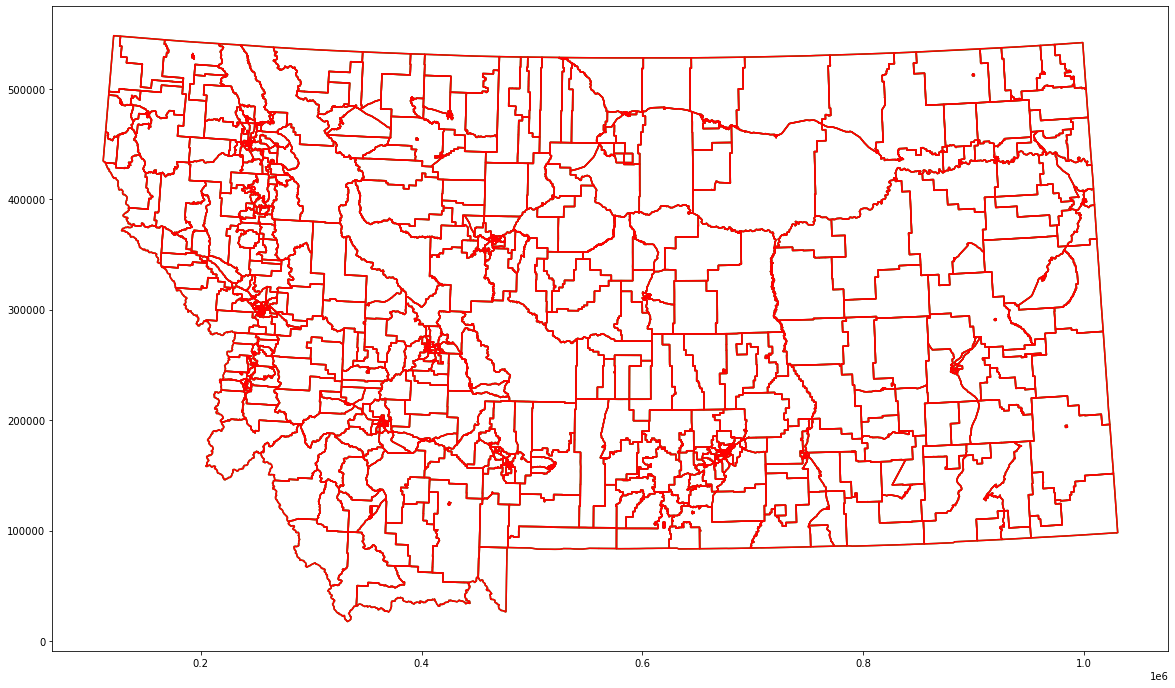

In [373]:
ax = mt_shp.boundary.plot(figsize=(20,20),color="green")
vest_mt_20.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [374]:
mt_shp["FIP_PREC"]=mt_shp['COUNTYFP10']+mt_shp['NAME']
mt_shp

,NUMBER,NAME,HOUSE,SENATE,POLLINGPLA,COUNTY,COUNTYCODE,STATEFP10,COUNTYFP10,SOURCE,LAST_UPDAT,PRECINCT_I,PRECINCT_C,COUNTY_ID,SHAPE_Leng,SHAPE_Area,geometry,FIP_PREC
0,000001,#1 Precinct - West,27,14,CJI ELE GYM,Liberty,48,30,051,2010 CENSUS GIS DATA,2012-07-31,4362,1 PREC,26,277799.765292,1.780197e+09,"POLYGON ((470897.374 529015.330, 471296.683 52...",051#1 Precinct - West
1,000001,1-HERON-HD13,13,7,HERON COMMUNITY CENTER,Sanders,35,30,089,COUNTY GIS DATA,2018-10-23,3750,#1,45,89108.059261,2.808293e+08,"POLYGON ((114102.250 461041.840, 114155.020 46...",0891-HERON-HD13
2,000001,1 WESTBY,34,17,WESTBY COMMUNITY HALL,Sheridan,34,30,091,DIGITIZED FROM COUNTY MAP,2019-06-21,4518,1_PREC,46,152033.377796,7.430864e+08,"POLYGON ((998562.006 541713.323, 998580.694 54...",0911 WESTBY
3,000001,COLUMBUS PRECINCT 1,57,29,STILLWATER PAVILLION,Stillwater,32,30,095,COUNTY GIS DATA,2019-08-01,2337,PREC_1,48,210565.225728,9.073550e+08,"POLYGON ((616112.063 176124.484, 616516.128 17...",095COLUMBUS PRECINCT 1
4,000001,FORT BENTON 1,27,14,FORT BENTON ELEMENTARY,Chouteau,19,30,015,DIGITIZED FROM COUNTY MAP,2018-09-18,1596,PCT_01,08,109711.564255,4.525434e+08,"POLYGON ((518671.300 403468.700, 518742.000 40...",015FORT BENTON 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,091RsE,RATTLSNK 91E,91,46,RATTLESNAKE SCHOOL,Missoula,4,30,063,COUNTY GIS DATA,2017-12-08,0101,RTSK91E,32,38610.036938,4.614562e+07,"MULTIPOLYGON (((269038.527 311285.230, 269069....",063RATTLSNK 91E
662,091RsW,RATTLSNK 91W,91,46,RATTLESNAKE SCHOOL,Missoula,4,30,063,COUNTY GIS DATA,2017-12-08,0102,RTSK91W,32,63995.590427,8.861097e+07,"POLYGON ((260921.486 320735.884, 261328.405 32...",063RATTLSNK 91W
663,098CSP,CSPORTER 98,98,49,C S PORTER SCHOOL,Missoula,4,30,063,COUNTY GIS DATA,2017-12-08,0072,CSPTR98,32,8405.353040,2.378015e+06,"POLYGON ((254663.592 300078.247, 254780.890 30...",063CSPORTER 98
664,100SJE,ST JOSEPH 100E,100,50,ST JOSEPH SCHOOL,Missoula,4,30,063,COUNTY GIS DATA,2017-12-08,0111,STJ100E,32,5803.940669,1.297146e+06,"POLYGON ((257366.239 299946.499, 257445.832 29...",063ST JOSEPH 100E


In [375]:
join_attempt_shape1 = pd.merge(vest_mt_20,mt_shp,how="outer",on="FIP_PREC",indicator=True)
print(join_attempt_shape1["_merge"].value_counts())
join_attempt_shape1.columns

both          657
left_only       9
right_only      9
Name: _merge, dtype: int64


Index(['STATEFP10_x', 'COUNTYFP10_x', 'COUNTY_x', 'NAME_x', 'SOSPRECINC',
       'G20PRERTRU', 'G20PREDBID', 'G20PRELJOR', 'G20USSRDAI', 'G20USSDBUL',
       'G20HALRROS', 'G20HALDWIL', 'G20GOVRGIA', 'G20GOVDCOO', 'G20GOVLBIS',
       'G20ATGRKNU', 'G20ATGDGRA', 'G20SOSRJAC', 'G20SOSDBEN', 'G20AUDRDOW',
       'G20AUDDMOR', 'G20AUDLROO', 'G20SPIRARN', 'G20SPIDROM', 'G20SPILLEA',
       'geometry_x', 'FIP_PREC', 'NUMBER', 'NAME_y', 'HOUSE', 'SENATE',
       'POLLINGPLA', 'COUNTY_y', 'COUNTYCODE', 'STATEFP10_y', 'COUNTYFP10_y',
       'SOURCE', 'LAST_UPDAT', 'PRECINCT_I', 'PRECINCT_C', 'COUNTY_ID',
       'SHAPE_Leng', 'SHAPE_Area', 'geometry_y', '_merge'],
      dtype='object')

In [376]:
join_attempt_shape1[join_attempt_shape1['_merge'] != 'both'][['COUNTY_x','SOSPRECINC','NAME_y','FIP_PREC']]

,COUNTY_x,SOSPRECINC,NAME_y,FIP_PREC
119,Madison,JEFFERSON ISLAND,NaN,057JEFFERSON ISLAND
190,Cascade,P22B,NaN,013P22B
387,Flathead,None,NaN,NaN
388,Flathead,None,NaN,NaN
389,Lake,None,NaN,NaN
481,Sanders,9-DIXON-HD14,NaN,0899-DIXON-HD14
656,Lake,PAB 1 HD93,NaN,047PAB 1 HD93
658,Lake,PAB 2 HD15,NaN,047PAB 2 HD15
659,Treasure,PRECINCT 1,NaN,103PRECINCT 1
666,NaN,NaN,Precinct 1,103Precinct 1


In [377]:
source_vest_shp_dict = {'057JEFF ISLAND':'057JEFFERSON ISLAND','013P22B.':'013P22B','0899-Dixon-HD14':'0899-DIXON-HD14','047PAB 1_HD93':'047PAB 1 HD93','047PAB 2_HD15':'047PAB 2 HD15','103Precinct 1':'103PRECINCT 1'}
mt_shp["FIP_PREC"]=mt_shp["FIP_PREC"].map(source_vest_shp_dict).fillna(mt_shp["FIP_PREC"])

In [378]:
join_attempt_shape2 = pd.merge(vest_mt_20,mt_shp,how="outer",on="FIP_PREC",indicator=True)
print(join_attempt_shape2["_merge"].value_counts())
join_attempt_shape2

both          663
left_only       3
right_only      3
Name: _merge, dtype: int64


,STATEFP10_x,COUNTYFP10_x,COUNTY_x,NAME_x,SOSPRECINC,G20PRERTRU,G20PREDBID,G20PRELJOR,G20USSRDAI,G20USSDBUL,...,COUNTYFP10_y,SOURCE,LAST_UPDAT,PRECINCT_I,PRECINCT_C,COUNTY_ID,SHAPE_Leng,SHAPE_Area,geometry_y,_merge
0,30,063,Missoula,Bonner 89,BONNER 89,93.0,112.0,2.0,105.0,109.0,...,063,COUNTY GIS DATA,2017-12-08,0065,BONN89,32,24590.269657,2.350447e+07,"POLYGON ((263282.638 302561.711, 263354.429 30...",both
1,30,063,Missoula,Bonner 92,BONNER 92,715.0,797.0,42.0,653.0,894.0,...,063,COUNTY GIS DATA,2017-12-08,0066,BONN92,32,75142.579778,2.090535e+08,"POLYGON ((270253.436 315619.189, 270300.218 31...",both
2,30,063,Missoula,C S Porter 98,CSPORTER 98,726.0,1218.0,76.0,677.0,1342.0,...,063,COUNTY GIS DATA,2017-12-08,0072,CSPTR98,32,8405.353040,2.378015e+06,"POLYGON ((254663.592 300078.247, 254780.890 30...",both
3,30,063,Missoula,Chief Charlo 90,CHIEF CHARLO 90,550.0,895.0,46.0,542.0,964.0,...,063,COUNTY GIS DATA,2017-12-08,0067,CHIEF90,32,10928.843092,3.815127e+06,"POLYGON ((255159.172 296324.566, 255152.862 29...",both
4,30,063,Missoula,Clinton 89,CLINTON 89,313.0,203.0,19.0,306.0,229.0,...,063,COUNTY GIS DATA,2017-12-08,0068,CLIN89,32,92158.646525,2.455595e+08,"POLYGON ((270340.860 296203.465, 270500.256 29...",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,30,007,Broadwater,Precinct 1,PRECINCT 1,681.0,205.0,15.0,667.0,239.0,...,007,2010 CENSUS GIS DATA,2012-07-31,5451,PREC_1,04,125074.686978,5.688999e+08,"POLYGON ((425113.429 260287.247, 425523.883 26...",both
665,30,017,Custer,Knowlton,KNOWLTON SCH,39.0,3.0,1.0,38.0,4.0,...,017,2010 CENSUS GIS DATA,2019-08-19,5106,13-37,09,198831.869768,1.016942e+09,"POLYGON ((926330.045 266303.945, 926350.138 26...",both
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,029,COUNTY GIS DATA,2017-12-08,None,None,15,85442.868939,3.035640e+08,"POLYGON ((280925.736 450294.106, 281044.601 44...",right_only
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,029,COUNTY GIS DATA,2017-12-08,None,None,15,391586.218151,3.494127e+09,"POLYGON ((282315.447 467940.184, 282135.231 46...",right_only


In [379]:
join_attempt_shape2[join_attempt_shape2['_merge'] != 'both'][['COUNTY_x','SOSPRECINC','NAME_y','FIP_PREC']]

,COUNTY_x,SOSPRECINC,NAME_y,FIP_PREC
387,Flathead,None,NaN,NaN
388,Flathead,None,NaN,NaN
389,Lake,None,NaN,NaN
666,NaN,NaN,NA,029NA
667,NaN,NaN,NA,029NA
668,NaN,NaN,NA,047NA


In [380]:
#print(vest_mt_20.iloc[[387,388,662]])
vest_mt_20.at[387,'FIP_PREC'] = 'FLATHEAD-1'
vest_mt_20.at[388,'FIP_PREC'] = 'FLATHEAD-2'
vest_mt_20.at[662,'FIP_PREC'] = 'LAKE-1'
print(vest_mt_20.iloc[[387,388,662]])

    STATEFP10 COUNTYFP10    COUNTY NAME SOSPRECINC  G20PRERTRU  G20PREDBID  \
387        30        029  Flathead   NA       None           0           0   
388        30        029  Flathead   NA       None           0           0   
662        30        047      Lake   NA       None           0           0   

     G20PRELJOR  G20USSRDAI  G20USSDBUL  ...  G20SOSRJAC  G20SOSDBEN  \
387           0           0           0  ...           0           0   
388           0           0           0  ...           0           0   
662           0           0           0  ...           0           0   

     G20AUDRDOW  G20AUDDMOR  G20AUDLROO  G20SPIRARN  G20SPIDROM  G20SPILLEA  \
387           0           0           0           0           0           0   
388           0           0           0           0           0           0   
662           0           0           0           0           0           0   

                                              geometry    FIP_PREC  
387  POLYGON

In [381]:
#mt_shp.iloc[437:440]
mt_shp.at[437,'FIP_PREC'] = 'FLATHEAD-1'
mt_shp.at[438,'FIP_PREC'] = 'LAKE-1'
mt_shp.at[439,'FIP_PREC'] = 'FLATHEAD-2'
mt_shp.iloc[437:440]

,NUMBER,NAME,HOUSE,SENATE,POLLINGPLA,COUNTY,COUNTYCODE,STATEFP10,COUNTYFP10,SOURCE,LAST_UPDAT,PRECINCT_I,PRECINCT_C,COUNTY_ID,SHAPE_Leng,SHAPE_Area,geometry,FIP_PREC
437,0000NA,NA,10,5,NA,Flathead,7,30,029,COUNTY GIS DATA,2017-12-08,None,None,15,85442.868939,3.035640e+08,"POLYGON ((280925.736 450294.106, 281044.601 44...",FLATHEAD-1
438,0000NA,NA,12,6,NA,Lake,15,30,047,COUNTY GIS DATA,2018-03-01,None,None,24,164611.557129,3.687516e+08,"POLYGON ((261696.070 421316.430, 261720.650 42...",LAKE-1
439,0000NA,NA,15,8,NA,Flathead,7,30,029,COUNTY GIS DATA,2017-12-08,None,None,15,391586.218151,3.494127e+09,"POLYGON ((282315.447 467940.184, 282135.231 46...",FLATHEAD-2


In [390]:
final_merge = pd.merge(vest_mt_20,mt_shp,how="outer",on="FIP_PREC",indicator="final_merge")
print(final_merge["final_merge"].value_counts())
final_merge

both          666
left_only       0
right_only      0
Name: final_merge, dtype: int64


,STATEFP10_x,COUNTYFP10_x,COUNTY_x,NAME_x,SOSPRECINC,G20PRERTRU,G20PREDBID,G20PRELJOR,G20USSRDAI,G20USSDBUL,...,COUNTYFP10_y,SOURCE,LAST_UPDAT,PRECINCT_I,PRECINCT_C,COUNTY_ID,SHAPE_Leng,SHAPE_Area,geometry_y,final_merge
0,30,063,Missoula,Bonner 89,BONNER 89,93,112,2,105,109,...,063,COUNTY GIS DATA,2017-12-08,0065,BONN89,32,24590.269657,2.350447e+07,"POLYGON ((263282.638 302561.711, 263354.429 30...",both
1,30,063,Missoula,Bonner 92,BONNER 92,715,797,42,653,894,...,063,COUNTY GIS DATA,2017-12-08,0066,BONN92,32,75142.579778,2.090535e+08,"POLYGON ((270253.436 315619.189, 270300.218 31...",both
2,30,063,Missoula,C S Porter 98,CSPORTER 98,726,1218,76,677,1342,...,063,COUNTY GIS DATA,2017-12-08,0072,CSPTR98,32,8405.353040,2.378015e+06,"POLYGON ((254663.592 300078.247, 254780.890 30...",both
3,30,063,Missoula,Chief Charlo 90,CHIEF CHARLO 90,550,895,46,542,964,...,063,COUNTY GIS DATA,2017-12-08,0067,CHIEF90,32,10928.843092,3.815127e+06,"POLYGON ((255159.172 296324.566, 255152.862 29...",both
4,30,063,Missoula,Clinton 89,CLINTON 89,313,203,19,306,229,...,063,COUNTY GIS DATA,2017-12-08,0068,CLIN89,32,92158.646525,2.455595e+08,"POLYGON ((270340.860 296203.465, 270500.256 29...",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,30,031,Gallatin,69A,PCT 69A,1372,532,58,1298,660,...,031,COUNTY GIS DATA,2018-09-27,0151,69A,16,212991.003110,7.934300e+08,"POLYGON ((457923.569 217011.789, 458325.037 21...",both
662,30,047,Lake,NA,None,0,0,0,0,0,...,047,COUNTY GIS DATA,2018-03-01,None,None,24,164611.557129,3.687516e+08,"POLYGON ((261696.070 421316.430, 261720.650 42...",both
663,30,007,Broadwater,Precinct 13,PRECINCT 13,857,166,25,838,213,...,007,2010 CENSUS GIS DATA,2012-07-31,5454,PREC_13,04,212002.525263,1.148313e+09,"POLYGON ((423894.239 226633.240, 425686.070 22...",both
664,30,007,Broadwater,Precinct 1,PRECINCT 1,681,205,15,667,239,...,007,2010 CENSUS GIS DATA,2012-07-31,5451,PREC_1,04,125074.686978,5.688999e+08,"POLYGON ((425113.429 260287.247, 425523.883 26...",both


In [391]:
print(final_merge.columns)

Index(['STATEFP10_x', 'COUNTYFP10_x', 'COUNTY_x', 'NAME_x', 'SOSPRECINC',
       'G20PRERTRU', 'G20PREDBID', 'G20PRELJOR', 'G20USSRDAI', 'G20USSDBUL',
       'G20HALRROS', 'G20HALDWIL', 'G20GOVRGIA', 'G20GOVDCOO', 'G20GOVLBIS',
       'G20ATGRKNU', 'G20ATGDGRA', 'G20SOSRJAC', 'G20SOSDBEN', 'G20AUDRDOW',
       'G20AUDDMOR', 'G20AUDLROO', 'G20SPIRARN', 'G20SPIDROM', 'G20SPILLEA',
       'geometry_x', 'FIP_PREC', 'NUMBER', 'NAME_y', 'HOUSE', 'SENATE',
       'POLLINGPLA', 'COUNTY_y', 'COUNTYCODE', 'STATEFP10_y', 'COUNTYFP10_y',
       'SOURCE', 'LAST_UPDAT', 'PRECINCT_I', 'PRECINCT_C', 'COUNTY_ID',
       'SHAPE_Leng', 'SHAPE_Area', 'geometry_y', 'final_merge'],
      dtype='object')


In [392]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    624
True      42
dtype: int64


1) For KIRBY DECKER difference in area is 0.1417402626715799
2) For Sand Springs difference in area is 0.17605709351402393
3) For Lavina difference in area is 0.25362236436340946
4) For Precinct 2 difference in area is 0.2686056817398029
5) For BUSBY difference in area is 0.21137339136622846
6) For Precinct 38 difference in area is 0.1066257994293618
7) For Precinct 4 difference in area is 0.2288024380295899
8) For Precinct 4 difference in area is 0.11698805098269865
9) For Precinct 5 difference in area is 0.23066588791582338
10) For 59B difference in area is 0.15168504122904808
11) For 59C difference in area is 0.14295320676143108
12) For Cohagen difference in area is 0.12708397842281327
13) For DAY1 difference in area is 1.0161056807336624
14) For Precinct 20 difference in area is 0.10682672532997955
15) For Precinct 26 difference in area is 0.29461798912609977
16) For Precinct 10 difference in area is 0.14924535251219853
17) For Precinct 7 difference in area is 0.1692571974157019
18

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\geopandas\plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


22) For 59D difference in area is 0.12072756907492063
23) For Kinsey difference in area is 0.15393168297331317
24) For Precinct 4 difference in area is 0.17906290460784313
25) For Precinct 3 difference in area is 0.4193406038496499
26) For Precinct 5 difference in area is 0.22609151835907149
27) For Precinct 3 difference in area is 0.7802756667317001
28) For Precinct 34 difference in area is 0.14528247836153538
29) For Precinct 31 difference in area is 0.12608966960150042
30) For Precinct 1 difference in area is 0.1259009492262154
31) For NA difference in area is 1.2314800222267237


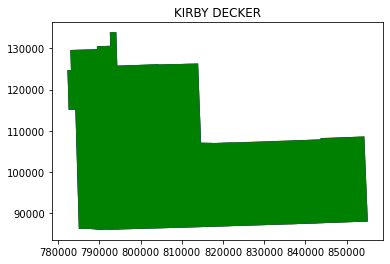

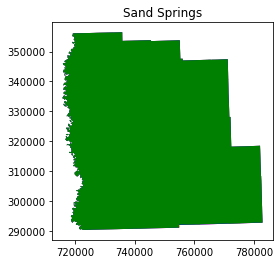

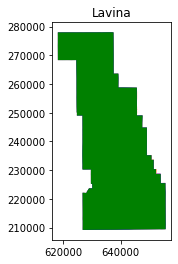

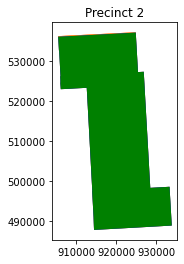

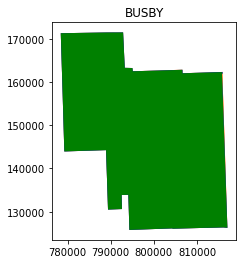

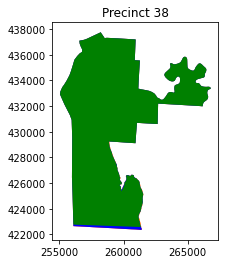

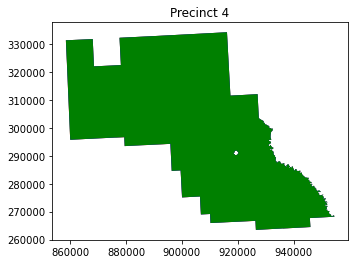

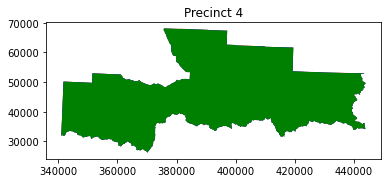

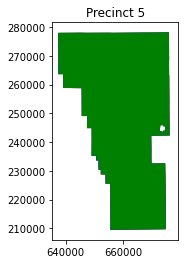

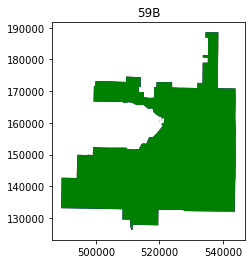

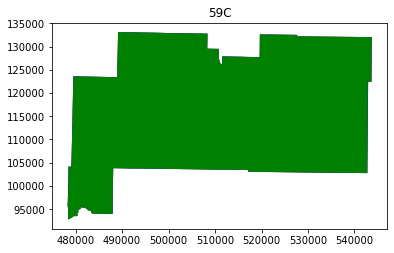

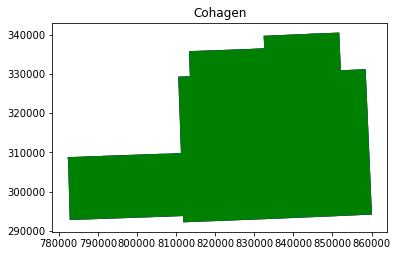

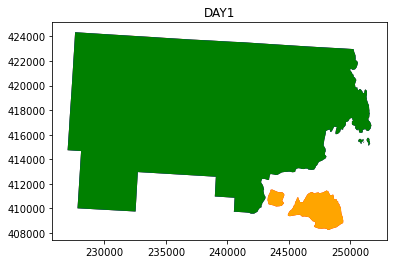

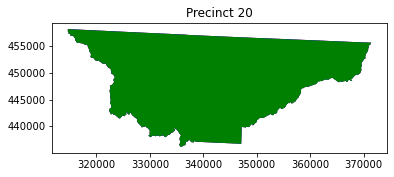

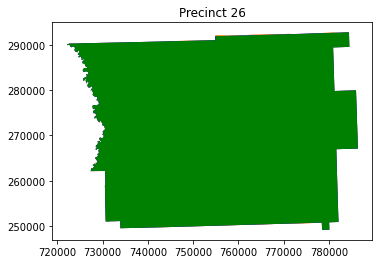

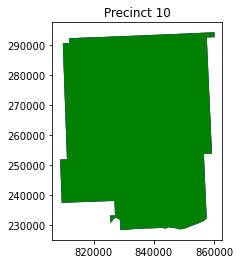

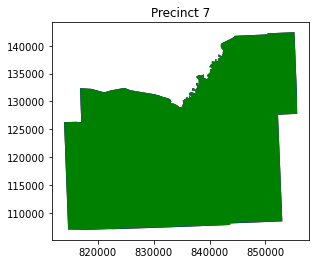

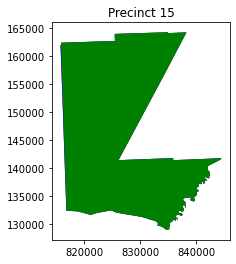

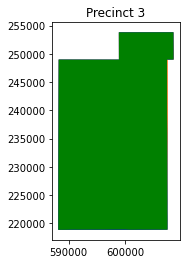

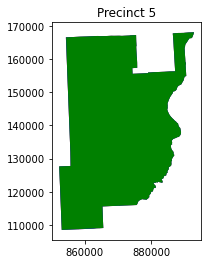

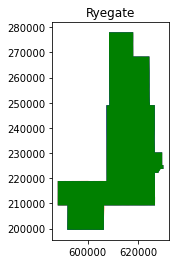

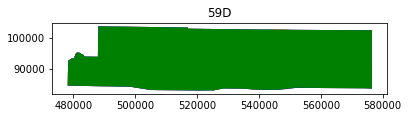

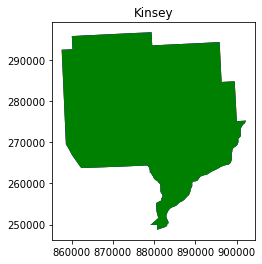

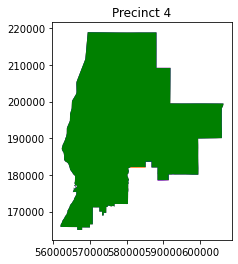

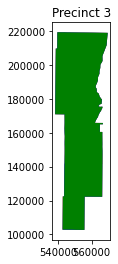

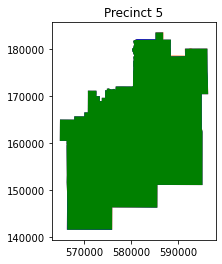

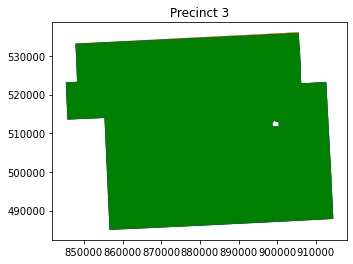

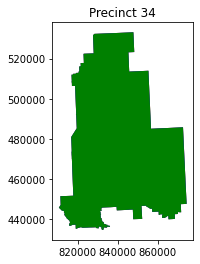

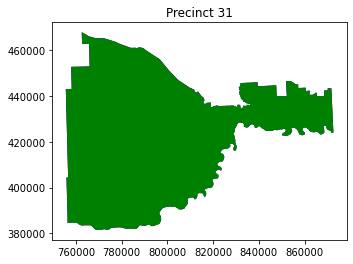

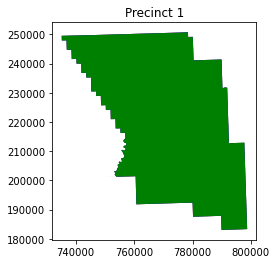

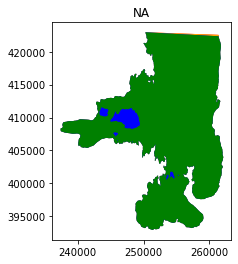

In [397]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .1):
        count += 1
        name = source_geoms.iat[i,3]
        
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [398]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")



(666, 1)
55 precincts w/ a difference of 0 km^2
580 precincts w/ a difference between 0 and .1 km^2
28 precincts w/ a difference between .1 and .5 km^2
1 precincts w/ a difference between .5 and 1 km^2
2 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2
